In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling as pdp
import lightgbm as lgb

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
path = os.getcwd()
print(path)

/workspace/code


In [4]:
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

In [5]:
df_train = pd.read_csv('/workspace/data/train.csv')
df_test =pd.read_csv('/workspace/data/test.csv')

In [6]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [8]:
df_train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

In [10]:
df_train_1_corr = df_train.iloc[:,-12:-1].corr()

In [11]:
mask = np.triu(np.ones_like(df_train_1_corr, dtype=bool))

<AxesSubplot:>

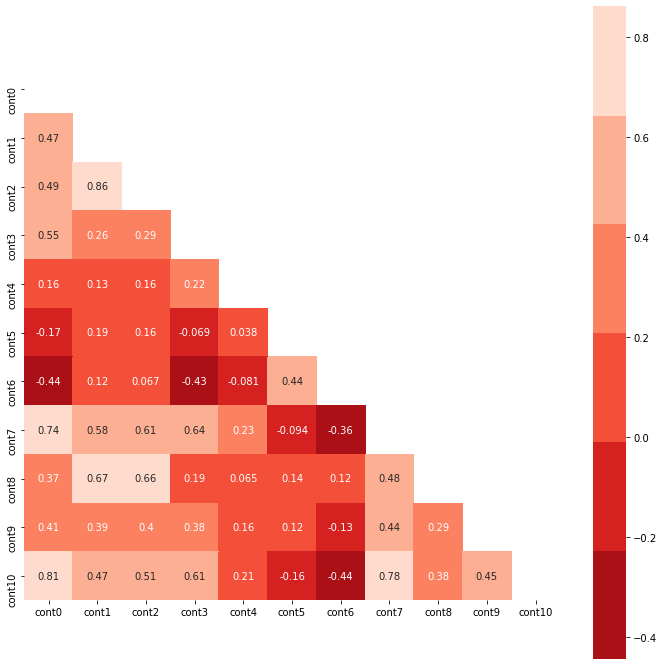

In [12]:
plt.figure(figsize=(12,12))
cmap = sns.color_palette("Reds_r")
sns.heatmap(df_train_1_corr, square=True, annot=True, mask=mask, cmap=cmap)

## LightGBMでとりあえず学習

### データ前処理(カテゴリ変数を変換) # ラベルエンコーディング

In [10]:
df_train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

In [15]:
cat_list = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18']

In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [23]:
df_train[cat_list] =oe.fit_transform(df_train[cat_list])

In [24]:
df_train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0.0,8.0,0.0,1.0,1.0,33.0,0.0,44.0,54.0,0.0,258.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0.0,8.0,0.0,0.0,4.0,33.0,8.0,48.0,3.0,5.0,162.0,0.0,1.0,0.0,1.0,3.0,1.0,3.0,1.0,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0.0,10.0,0.0,0.0,4.0,33.0,0.0,30.0,38.0,9.0,69.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0.0,10.0,0.0,2.0,4.0,33.0,0.0,50.0,3.0,5.0,241.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0.0,8.0,6.0,1.0,4.0,33.0,2.0,32.0,54.0,0.0,75.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,0.0,13.0,5.0,0.0,4.0,45.0,0.0,19.0,48.0,0.0,159.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,0.0,10.0,0.0,0.0,6.0,33.0,0.0,36.0,4.0,4.0,163.0,0.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,0.0,6.0,12.0,0.0,7.0,33.0,2.0,37.0,43.0,0.0,156.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,3.0,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,1.0,7.0,0.0,3.0,1.0,33.0,0.0,1.0,23.0,0.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0


In [ ]:
# 元に戻すのであれば、invers_transform
#oe = preprocessing.OrdinalEncoder()
#encoded = oe.fit_transform(df[['Embarked', 'Sex']].values)
#decoded = oe.inverse_transform(encoded)

In [26]:
# testデータもラベルエンコーディングする
df_test[cat_list] =oe.fit_transform(df_test[cat_list])

#### データを交差検証用に分割

In [27]:
# trainデータを7:3に分割
X_train, X_test = train_test_split(df_train, train_size=0.7,random_state=1)

In [28]:
X_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
51295,85460,0.0,10.0,0.0,1.0,3.0,33.0,7.0,31.0,60.0,5.0,266.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.871147,0.541951,0.626311,0.622117,0.243285,0.092515,0.071281,0.848721,0.550586,0.377544,0.780668,0
255119,425285,0.0,11.0,8.0,1.0,4.0,33.0,0.0,47.0,60.0,0.0,242.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,1.0,0.949851,0.595453,0.920324,0.867490,0.227583,0.619677,0.271239,0.845413,0.710628,0.550379,0.936078,1
245089,408526,1.0,8.0,3.0,0.0,5.0,33.0,0.0,19.0,38.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.340058,0.268377,0.310116,0.224428,0.714035,0.555303,0.414089,0.469949,0.374271,0.293190,0.306396,0
228256,380529,0.0,10.0,6.0,0.0,4.0,33.0,0.0,50.0,38.0,5.0,69.0,0.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0,0.335506,0.343471,0.337666,0.590485,0.820250,0.735545,0.550893,0.214421,0.407081,0.479866,0.313092,0
181558,302918,0.0,8.0,0.0,1.0,4.0,33.0,2.0,8.0,23.0,8.0,54.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0,0.053059,0.340043,0.325724,0.342276,0.239736,0.737873,0.556328,0.348639,0.359217,0.738342,0.273453,0


In [29]:
X_test.shape

(90000, 32)

In [30]:
y_train = X_train['target']

In [31]:
y_test = X_test['target']

In [32]:
# idとtarget列を削除
X_train = X_train.iloc[:,1:-1]

In [33]:
X_test = X_test.iloc[:,1:-1]

In [34]:
# データ数を確認
print("X_train{},X_test{},Y_train{},Y_test{}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train(210000, 30),X_test(90000, 30),Y_train(210000,),Y_test(90000,)


In [35]:
train_data = lgb.Dataset(X_train, y_train)
eval_data = lgb.Dataset(X_test, y_test)

In [36]:
X_train.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10'],
      dtype='object')

In [37]:
# カテゴリ変数を指定
cat_list = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18']

In [38]:
# LightGBM.trainのパラメータを設定
params = {
'task': 'train',
'boosting_type': 'gbdt',
'objective': 'binary',
'verbose': 2,
}

In [39]:
gbm = lgb.train(
params,
train_data,
valid_sets=eval_data,
num_boost_round=100,
verbose_eval=5,
categorical_feature = cat_list
)

/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat0', 'cat1', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Number of positive: 55683, number of negative: 154317
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.783243
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.301528
[LightGBM] [Debug] init for col-wise cost 0.005668 seconds, init for row-wise cost 0.016764 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 3390
[LightGBM] [Info] Number of data points in the train set: 210000, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265157 -> initscore=-1.019334
[LightGBM] [Info] Start training from score -1.019334
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth 

In [48]:
# Feature＿importanceを表示
importance = pd.DataFrame(gbm.feature_importance(), index=X_train.columns, columns=['importance']).sort_values('importance',ascending= False)
display(importance)

,importance
cat10,962
cat7,398
cat8,375
cat1,124
cont4,87
cont5,85
cont2,72
cont8,68
cont6,66
cat2,65


In [49]:
df_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,0.0,5.0,0.0,0.0,5.0,33.0,0.0,8.0,23.0,0.0,249.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,0.0,7.0,2.0,0.0,4.0,2.0,7.0,31.0,51.0,0.0,269.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,0.0,13.0,2.0,0.0,5.0,2.0,0.0,8.0,28.0,0.0,121.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,1.0,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,1.0,11.0,2.0,0.0,5.0,33.0,0.0,30.0,23.0,0.0,162.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,0.0,5.0,0.0,1.0,5.0,33.0,0.0,8.0,46.0,0.0,173.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [51]:
df_pred = df_test.iloc[:,1:]

In [53]:
y_pred = gbm.predict(df_pred, num_iteration=gbm.best_iteration)

In [61]:
type(y_pred)

numpy.ndarray

In [62]:
y_pred = pd.Series(y_pred)

In [63]:
y_pred

0         0.150250
1         0.482058
2         0.044983
3         0.122392
4         0.108556
            ...   
199995    0.861325
199996    0.090182
199997    0.658615
199998    0.114696
199999    0.455319
Length: 200000, dtype: float64

In [58]:
y_pred_id = df_test['id']

In [66]:
y_pred_df = pd.concat([y_pred_id, y_pred],axis =1)

In [69]:
y_pred_df['0'] = 'target'

In [68]:
y_pred_df.to_csv('submission.csv',index=False)

In [72]:
y_pred_df = (y_pred_df.drop(y_pred_df.columns[2], axis=1))

In [73]:
y_pred_df

,id,0
0,5,0.150250
1,6,0.482058
2,8,0.044983
3,9,0.122392
4,11,0.108556
...,...,...
199995,499983,0.861325
199996,499984,0.090182
199997,499987,0.658615
199998,499994,0.114696


In [76]:
y_pred_df = y_pred_df.rename(columns={0: 'target'})

In [77]:
y_pred_df

,id,target
0,5,0.150250
1,6,0.482058
2,8,0.044983
3,9,0.122392
4,11,0.108556
...,...,...
199995,499983,0.861325
199996,499984,0.090182
199997,499987,0.658615
199998,499994,0.114696


In [78]:
y_pred_df.to_csv('submission.csv',index=False)